## Question 6

Design and create a computer program that produces an arbitrary number of samples of propagation pathloss using a d^n pathloss model with lognormal shadowing. Your program is a radio propagation simulator, and should use, as inputs, the T-R separation, frequency, the pathloss exponent, the standard deviation of the log-normal shadowing, the close-in-reference distance, and the number of desired predicted samples. Your program should provide a check that insures that the input T-R separation is equal to or exceeds the specified input close-in-reference distance, and should provide a graphical output of the produced samples as a function of pathloss and distance ( this is called a scatter plot).
Verify the accuracy of your computer program by running it for 50 samples at each of 5 different T-R separation distances (a total of 250 predicted pathloss values), and determine the best fit pathloss exponent and the standard deviation about the mean pathloss exponent of the predicted data using the techniques as described in example in the class. Draw the best fit mean pathloss model on the scatter plot to illustrate the fit of the model to the predicted values. You will know your simulator is working if the best fit pathloss model and the standard deviation for your simulated data is equal to the parameters you specified as inputs to your simulators.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy import N as NEval
import math


In [12]:
def pathloss_model(distance, n, sigma, f, d0):
    # Check if the T-R separation is less than d0
    if np.any(distance < d0):
        raise ValueError("T-R separation must be greater than or equal to d0.")
    
    lambda_=3e8/f
    # Calculate the pathloss without shadowing
    pathloss = 10*n * np.log10(distance / d0) + 20 * np.log10(4 * np.pi * d0 / lambda_ )
    
    # Add lognormal shadowing
    shadowing = np.random.normal(0, sigma)
    
    return pathloss + shadowing

In [20]:
distance_values = np.array([100, 200, 300, 400, 500])
carrier_frequency = 2.4e9
reference_distance = 1
path_loss_exponent = 4
num_samples = 50
shadowing_stddev = 8
speed_of_light = 3e8 / carrier_frequency
path_loss_matrix = np.zeros((len(distance_values), num_samples))
reference_path_loss = 20 * np.log10(4 * np.pi * reference_distance / speed_of_light)
for i, distance in enumerate(distance_values):
    for j in range(num_samples):
        path_loss_matrix[i, j] = pathloss_model(distance, path_loss_exponent, shadowing_stddev, carrier_frequency, reference_distance)

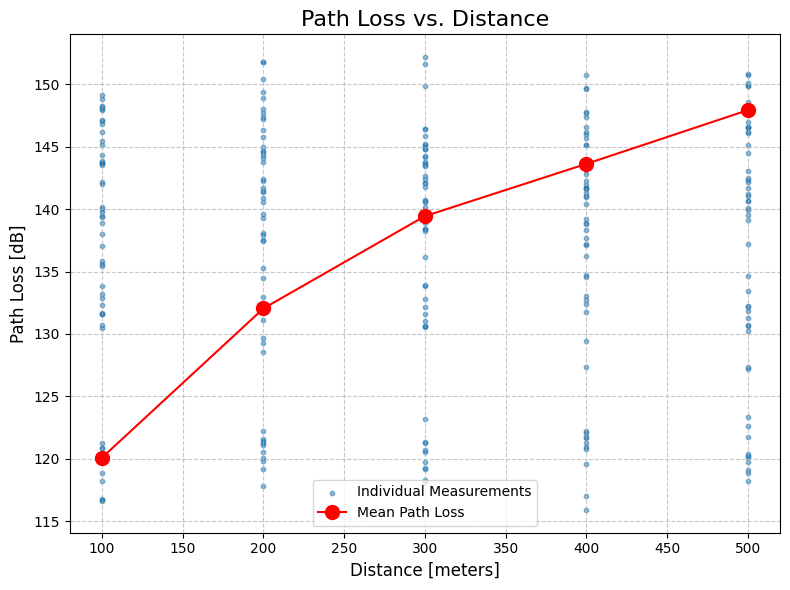

In [22]:

plt.figure(figsize=(8, 6))
plt.scatter(np.tile(distance_values, 50), path_loss_matrix, s=10, alpha=0.5, label="Individual Measurements")
plt.plot(distance_values, np.mean(path_loss_matrix, axis=1), marker="o", markersize=10, linestyle="-", color="red", label="Mean Path Loss")
plt.xlabel("Distance [meters]", fontsize=12)
plt.ylabel("Path Loss [dB]", fontsize=12)
plt.title("Path Loss vs. Distance", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
def calculate_path_loss_estimate(
    distances: np.ndarray,
    reference_path_loss: float,
    reference_distance: float,
    path_loss_exponent: float,
):
    return reference_path_loss + 10 * path_loss_exponent * np.log10(distances / reference_distance)

In [25]:
# Define the path loss exponent symbol
path_loss_exponent = Symbol("alpha")

# Calculate path loss estimation
path_loss_estimate = calculate_path_loss_estimate(distance_values, reference_path_loss, reference_distance, path_loss_exponent)

In [35]:
# Minimum mean square error
MSE = (np.mean(path_loss_matrix, axis=1) - path_loss_estimate) ** 2
dMSE = 0
# Derivative of MSE wrt alpha
for i in range(len(MSE)):
    dMSE += diff(MSE[i], path_loss_exponent )
    
alpha_est = solve(dMSE, path_loss_exponent )

In [52]:
MSE 


array([6407.69152821533*(1 - 0.249849910109671*alpha)**2,
       8463.74478291061*(1 - 0.250115726979607*alpha)**2,
       9878.62117736586*(1 - 0.249229301310951*alpha)**2,
       10728.2621874774*(1 - 0.251219077091836*alpha)**2,
       11637.372736769*(1 - 0.250190367821027*alpha)**2], dtype=object)

In [41]:
# Estimate the variance:
total_samples=250
MSE_alpha=13204.66516 # Substitude alpha into the MSE Equation
variance_sq = MSE_alpha/(total_samples-1)
variance = math.sqrt(variance_sq)


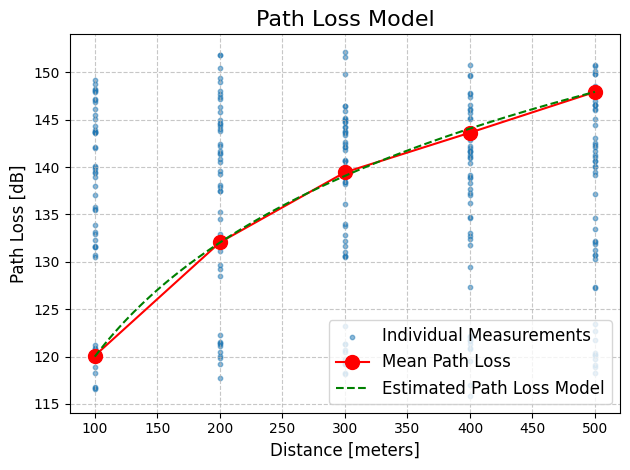

Theoretical Value of Alpha: 4
Estimated Value of Alpha:  3.99735866827630
Theoretical Value of Variance: 8
Estimated Value of Alpha:  7.282223820722651


In [45]:
# Individual measurements
plt.scatter(np.tile(distance_values, 50), path_loss_matrix, s=10, alpha=0.5, label="Individual Measurements")

# Mean path loss
mean_path_loss = np.mean(path_loss_matrix, axis=1)
plt.plot(distance_values, mean_path_loss, marker="o", markersize=10, color="red", label="Mean Path Loss")

# Estimated path loss model
d = np.linspace(min(distance_values), max(distance_values), 100)
best_fit = calculate_path_loss_estimate(d, reference_path_loss, reference_distance, alpha_est[0])
plt.plot(d, best_fit, linestyle="--", color="green", label="Estimated Path Loss Model")

plt.title("Path Loss Model", fontsize=16)
plt.xlabel("Distance [meters]", fontsize=12)
plt.ylabel("Path Loss [dB]", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


print("Theoretical Value of Alpha: 4")
print("Estimated Value of Alpha: ", alpha_est[0])

print("Theoretical Value of Variance: 8")
print("Estimated Value of Alpha: ", variance)

## Question 7



a)	Generate 200 samples of a Rayleigh random variable R with E{R2}=1. Plot the samples in a stem plot. Remember that R = |X+jY|, where X and Y are zero mean, independent Gaussian random variables (r.v). Your Gaussian r.v. X and Y (produced by randn command) must each have equal variance equal to ½. 


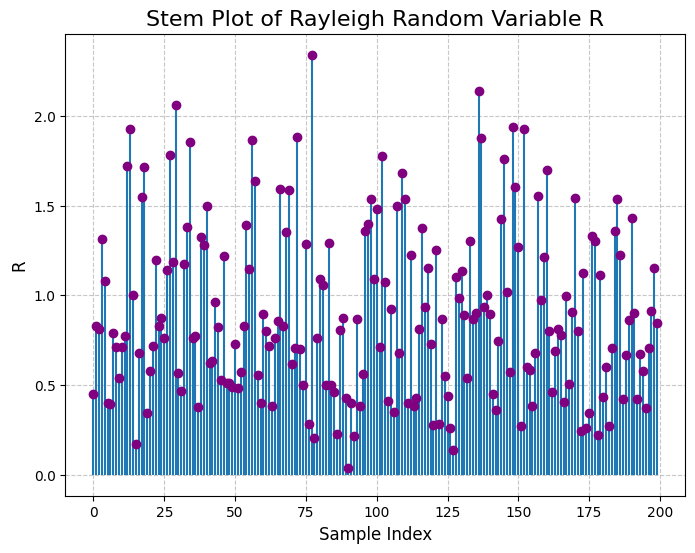

In [69]:
num_samples = 200
mean = 0
variance = 1/2
X = np.random.normal(mean, np.sqrt(variance), num_samples)
Y = np.random.normal(mean, np.sqrt(variance), num_samples)

R = np.abs(X + 1j * Y)

plt.figure(figsize=(8, 6))
plt.stem(range(num_samples), R, basefmt=" ", linefmt="-", markerfmt="purple")
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('R', fontsize=12)
plt.title('Stem Plot of Rayleigh Random Variable R', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


b)	Give the the estimated rms value of R, based on the 200 samples generated, which is given as sqrtR**2

In [70]:
# Calculate R as the absolute value of (X + jY)
R = np.abs(X + 1j * Y)

# Calculate the estimated RMS value of R
estimated_rms = np.sqrt(np.mean(R**2))

print(estimated_rms)

1.0202772601964447


c)	What fraction (if any) of these Rayleigh samples are 10dB below the estimated rms value?(Note that this threshold corresponds to p= -10 db in context of level crossing.

In [71]:
# Calculate the threshold value corresponding to 10 dB below the estimated RMS value
threshold_db = -10  # 10 dB below
threshold_value = estimated_rms * 10**(threshold_db / 10)

# Count how many samples are below the threshold
below_threshold_samples = np.sum(R < threshold_value)

# Calculate the fraction of samples below the threshold
fraction_below_threshold = below_threshold_samples / num_samples

print("Estimated RMS value of R:", estimated_rms)
print("Threshold Value:", threshold_value)
print("Fraction of samples below the threshold:", fraction_below_threshold)

Estimated RMS value of R: 1.0202772601964447
Threshold Value: 0.10202772601964448
Fraction of samples below the threshold: 0.005


d)	Generate 200 samples of a Rician random variable by adding means  m_r= 5cos(π/3)  and m_i= 5sin(π/3), respectively to the real part (X) and imaginary part (Y) in part (a). Plot the samples in stem plot. What is the K factor of this Rician random variable?

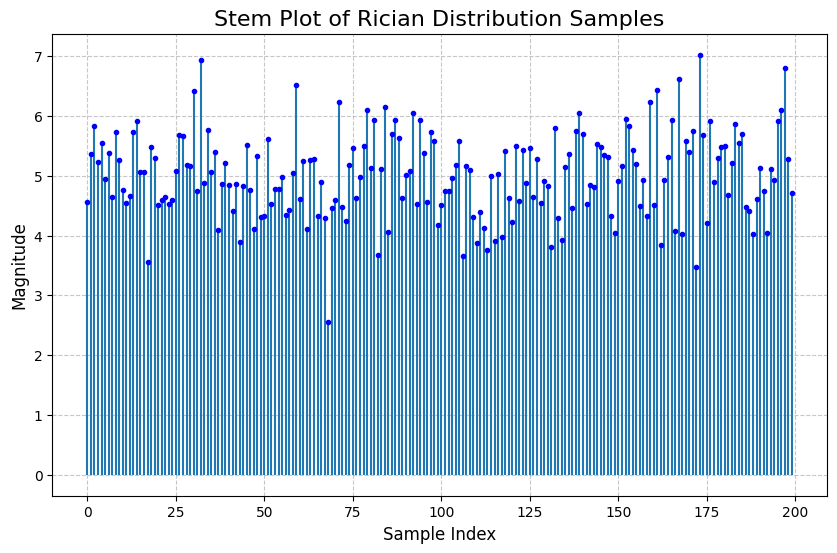

K Factor: 25.027463862685803


In [52]:
# Number of samples
num_samples = 200

# Define parameters for the Rician distribution
mean_real = 5 * math.cos(math.pi / 3)
mean_imag = 5 * math.sin(math.pi / 3)
variance = 0.5

rand_rician = (mean_real + np.random.normal(loc=0, scale=np.sqrt(variance), size=num_samples)) + (
    1j * (np.random.normal(loc=0, scale=np.sqrt(variance), size=num_samples) + mean_imag)
)

samples_magnitudes = np.abs(rand_rician)

plt.figure(figsize=(10, 6))
plt.stem(range(num_samples), samples_magnitudes, basefmt=" ", linefmt="-", markerfmt="b.")

plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Magnitude', fontsize=12)
plt.title('Stem Plot of Rician Distribution Samples', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
# Calculate the K factor
K = np.abs(mean_real + 1j * mean_imag) ** 2 / (2 * np.var(samples_magnitudes))
print("K Factor:", K)

e)	Repeat part (d) except use m_r= 5cos(π/6) and m_i= (5sin(π/6)). Plot the samples in stem plot. What is the effect of phase change on the appearance of stem plot?

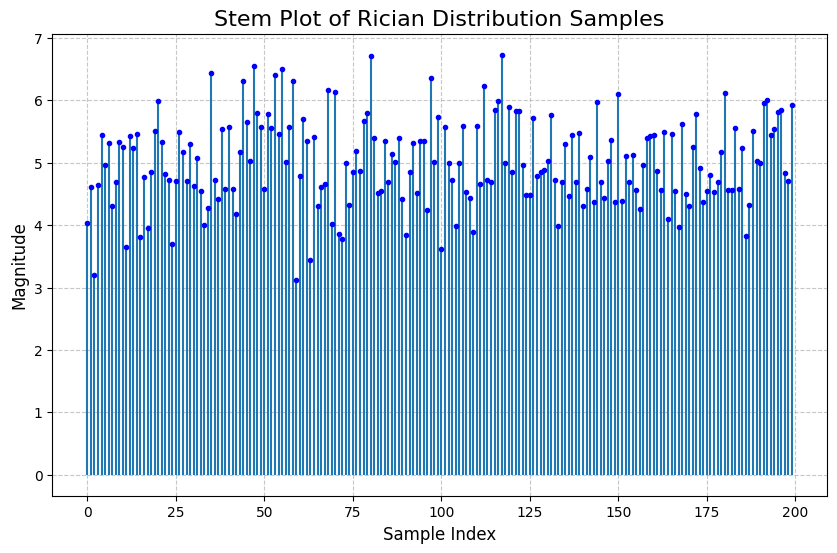

K Factor: 25.862778314617856


In [50]:
# Number of samples
num_samples = 200

# Define parameters for the Rician distribution
mean_real = 5 * math.cos(math.pi / 6)
mean_imag = 5 * math.sin(math.pi / 6)
variance = 0.5

rand_rician = (mean_real + np.random.normal(loc=0, scale=np.sqrt(variance), size=num_samples)) + (
    1j * (np.random.normal(loc=0, scale=np.sqrt(variance), size=num_samples) + mean_imag)
)

samples_magnitudes = np.abs(rand_rician)

plt.figure(figsize=(10, 6))
plt.stem(range(num_samples), samples_magnitudes, basefmt=" ", linefmt="-", markerfmt="b.")

plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Magnitude', fontsize=12)
plt.title('Stem Plot of Rician Distribution Samples', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
# Calculate the K factor
K = np.abs(mean_real + 1j * mean_imag) ** 2 / (2 * np.var(samples_magnitudes))
print("K Factor:", K)

f)	We now normalize the Rician random variables to have unit mean square value. Let Rn be the nth sample from Part (d). Make 200 normalized r.v. as W_n= Rn/sqrtRn**2, plot the W-n's as a stem plot and compare to Part (a). What fraction of samples of W are 10dB below the rms value of W (should be fewer, because there should be less fading). 



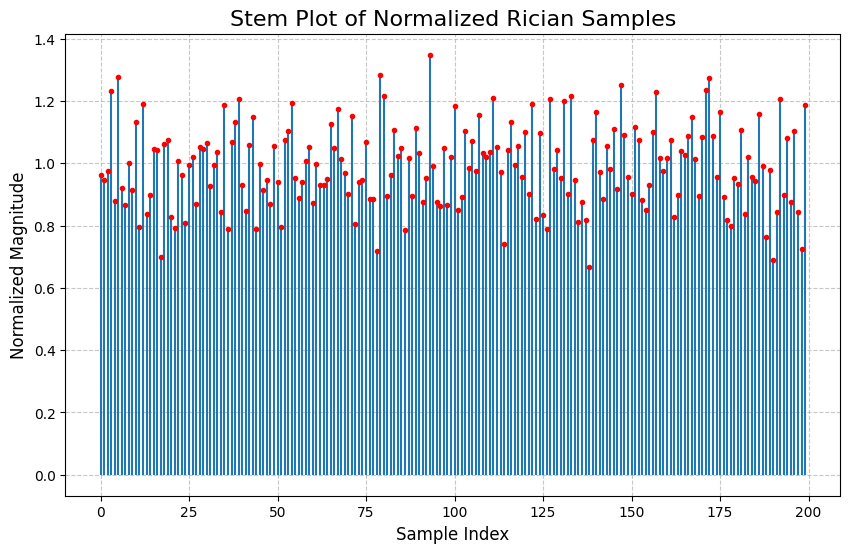

Fraction of samples 10dB below the RMS value: 0.00%
RMS value is  1.0


In [57]:

num_samples = 200
mean_real = 5 * math.cos(math.pi / 3)
mean_imag = 5 * math.sin(math.pi / 3)
variance = 0.5
rand_rician = (mean_real + np.random.normal(loc=0, scale=np.sqrt(variance), size=num_samples)) + (
    1j * (np.random.normal(loc=0, scale=np.sqrt(variance), size=num_samples) + mean_imag)
)
samples_magnitudes = np.abs(rand_rician)
normalized_samples = rand_rician / np.sqrt(np.square(np.abs(rand_rician)).mean())

# Create a stem plot for the normalized samples
plt.figure(figsize=(10, 6))
plt.stem(range(num_samples), np.abs(normalized_samples), basefmt=" ", linefmt="-", markerfmt="r.")

plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Normalized Magnitude', fontsize=12)
plt.title('Stem Plot of Normalized Rician Samples', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
rms_value_normalized = np.sqrt(np.square(np.abs(normalized_samples)).mean())
threshold = 10  # dB below RMS
threshold_value = 10 ** (threshold / 20) * rms_value_normalized
fraction_below_threshold = np.sum(np.abs(normalized_samples) > threshold_value) / num_samples
print(f"Fraction of samples 10dB below the RMS value: {fraction_below_threshold:.2%}")

print("RMS value is ", rms_value_normalized)